In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"                  # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
plt.style.use('ggplot')                     # 스타일 서식지정
plt.rcParams['axes.unicode_minus']=False    # 마이너스 부호 출력 설정

In [5]:
# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)
df = df.loc[5:9]


In [7]:
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)

In [8]:
df.set_index('발전 전력별', inplace=True)
df = df.T

In [9]:
# 증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) - 1) * 100

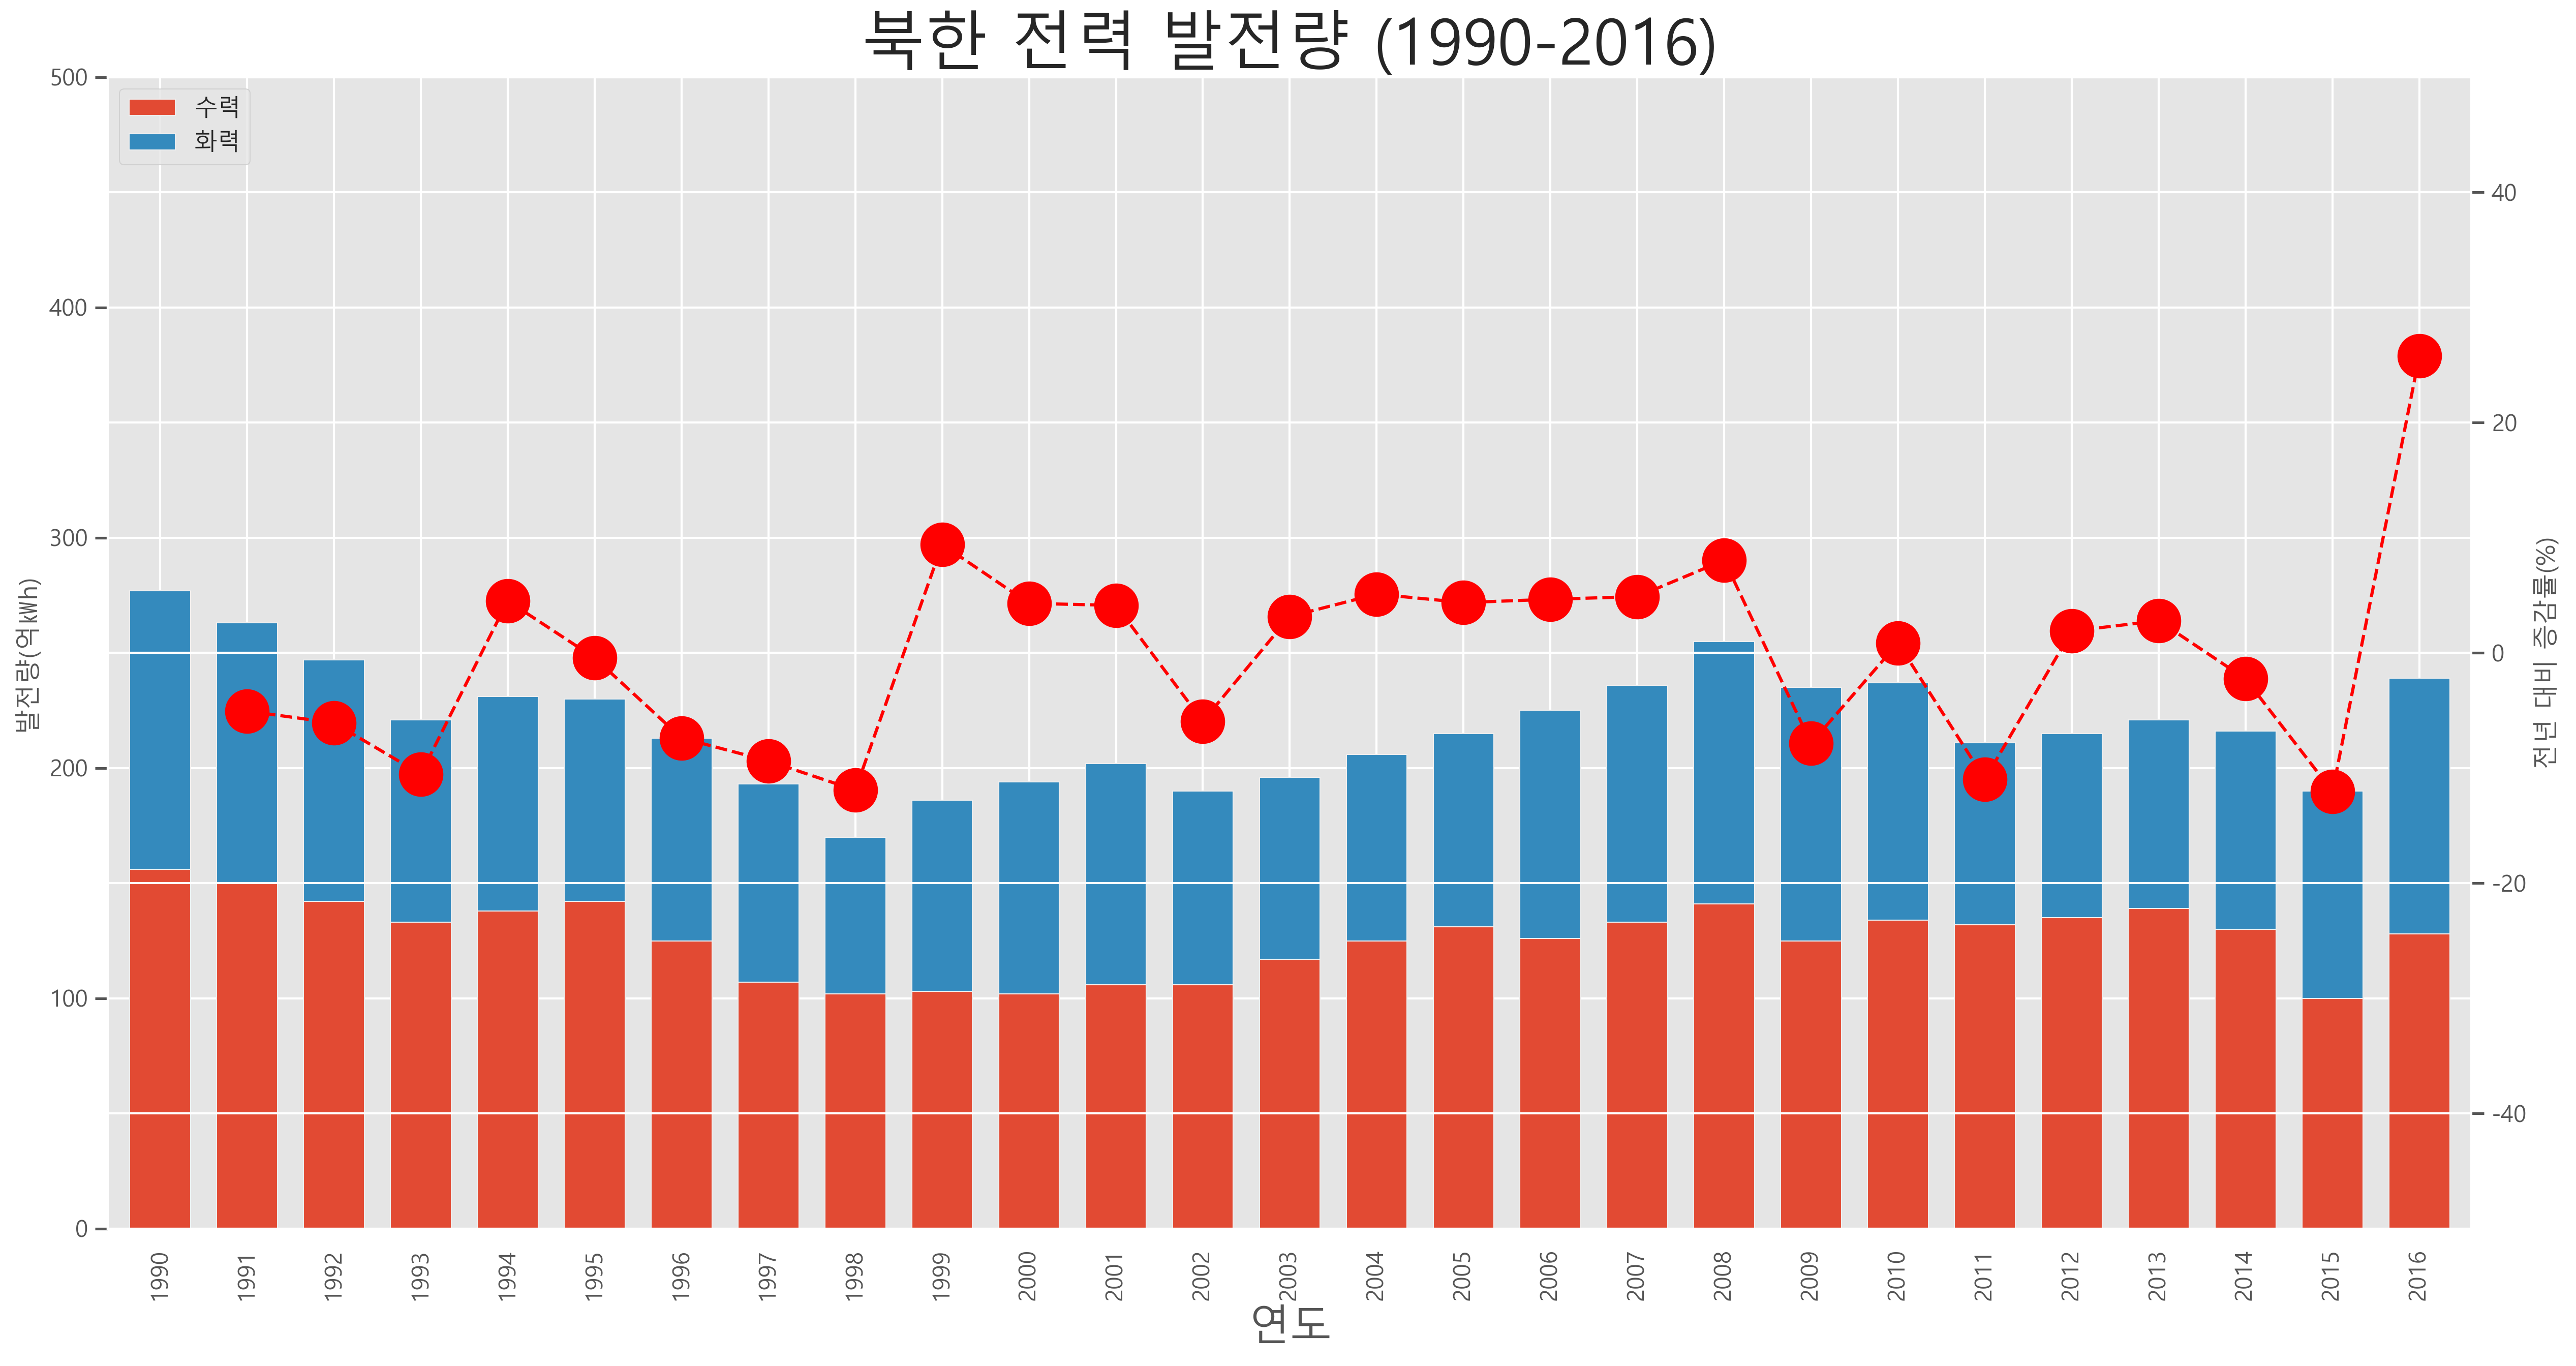

In [10]:
# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
         color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억㎾h)')
ax2.set_ylabel('전년 대비 증감률(%)')
plt.title('북한 전력 발전량 (1990-2016)', size=30)
ax1.legend(loc='upper left')

plt.show()